# *Diwali Sales Analysis : Python Project*

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

**Loading Data**

In [2]:
dw = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [3]:
dw.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
dw.shape

(11251, 15)

# ---------------------------------------------------------

**Data Cleaning**

In [5]:
dw.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
dw.drop(['Status','unnamed1'],axis =1 , inplace = True)

In [8]:
dw.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
dw.dropna(inplace = True)

**Exploratory Data Analysis**

In [10]:
dw.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# -------------------------------------------------------  
**Exploratory Data Analysis :-**

**Gender Wise**

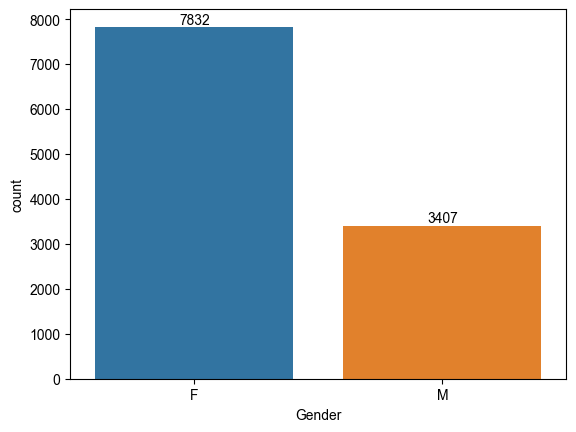

In [11]:
ax = sns.countplot(x = 'Gender' , data = dw  ,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
sns.set (rc = {'figure.figsize':(28,6)})

In [12]:
gen_wise_sale = dw.groupby(['Gender'] , as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False)
gen_wise_sale

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


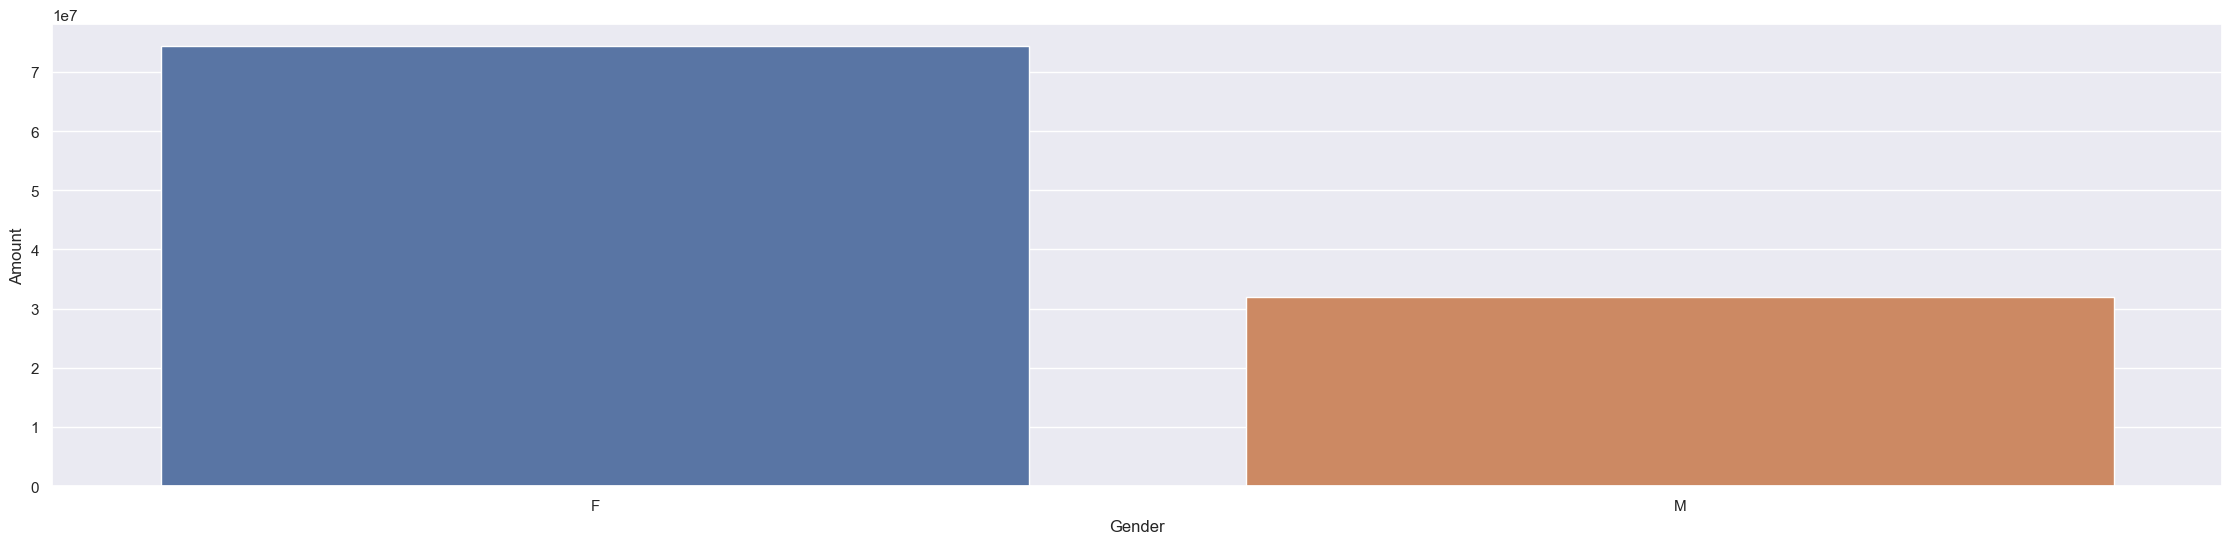

In [13]:
sns.barplot(x='Gender' , y='Amount' ,data = gen_wise_sale ,hue='Gender')
sns.set (rc = {'figure.figsize':(28,6)})

**Based on the data, women appear to be the primary consumers and have a higher purchasing capacity than men.**

# ---------------------------------------------------------

**Age Wise**

In [14]:
dw.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

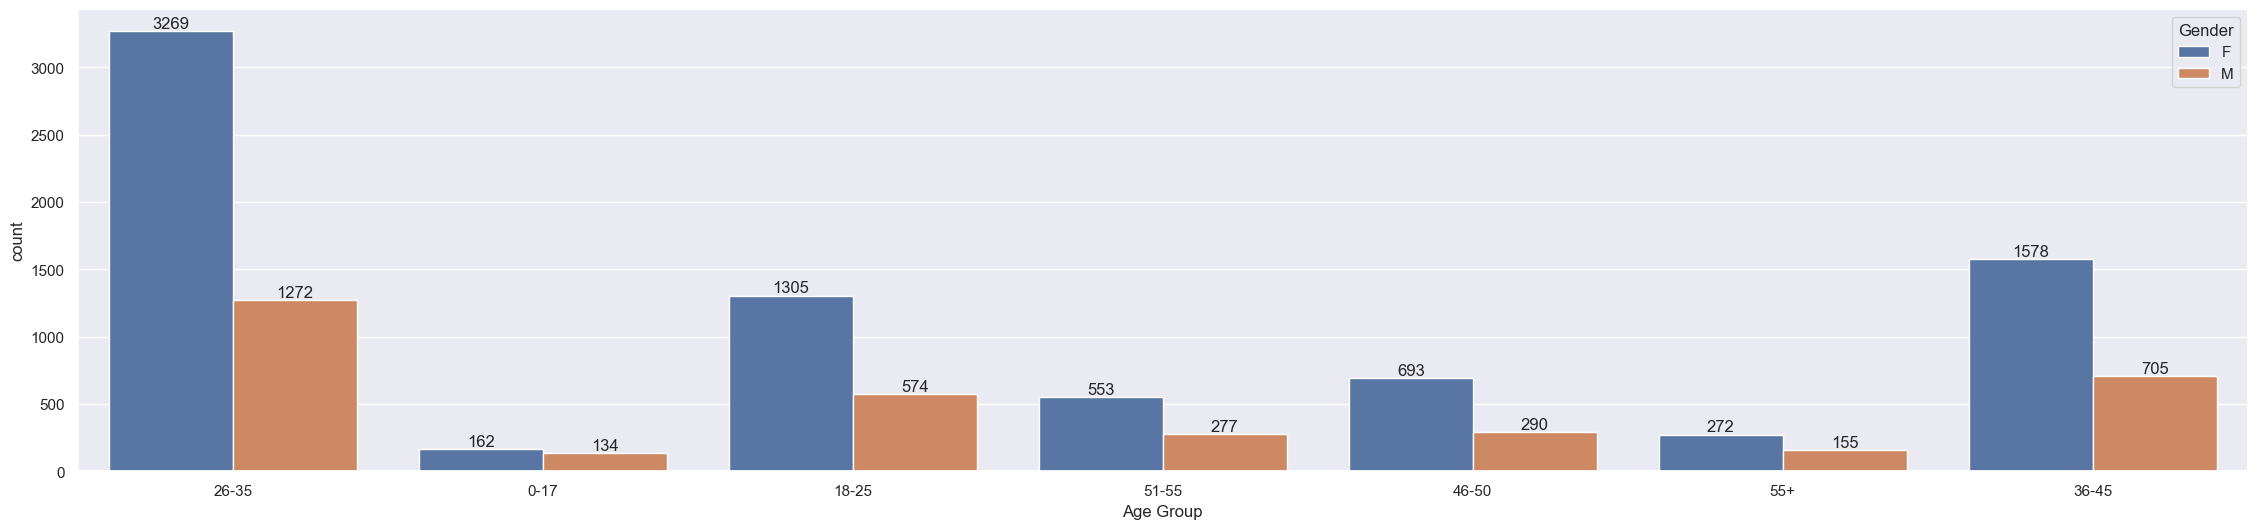

In [15]:
ax = sns.countplot(x='Age Group' , data = dw ,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
sns.set (rc = {'figure.figsize':(28,6)})

In [16]:
age_wise_sale = dw.groupby(['Age Group'] , as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False)
age_wise_sale

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


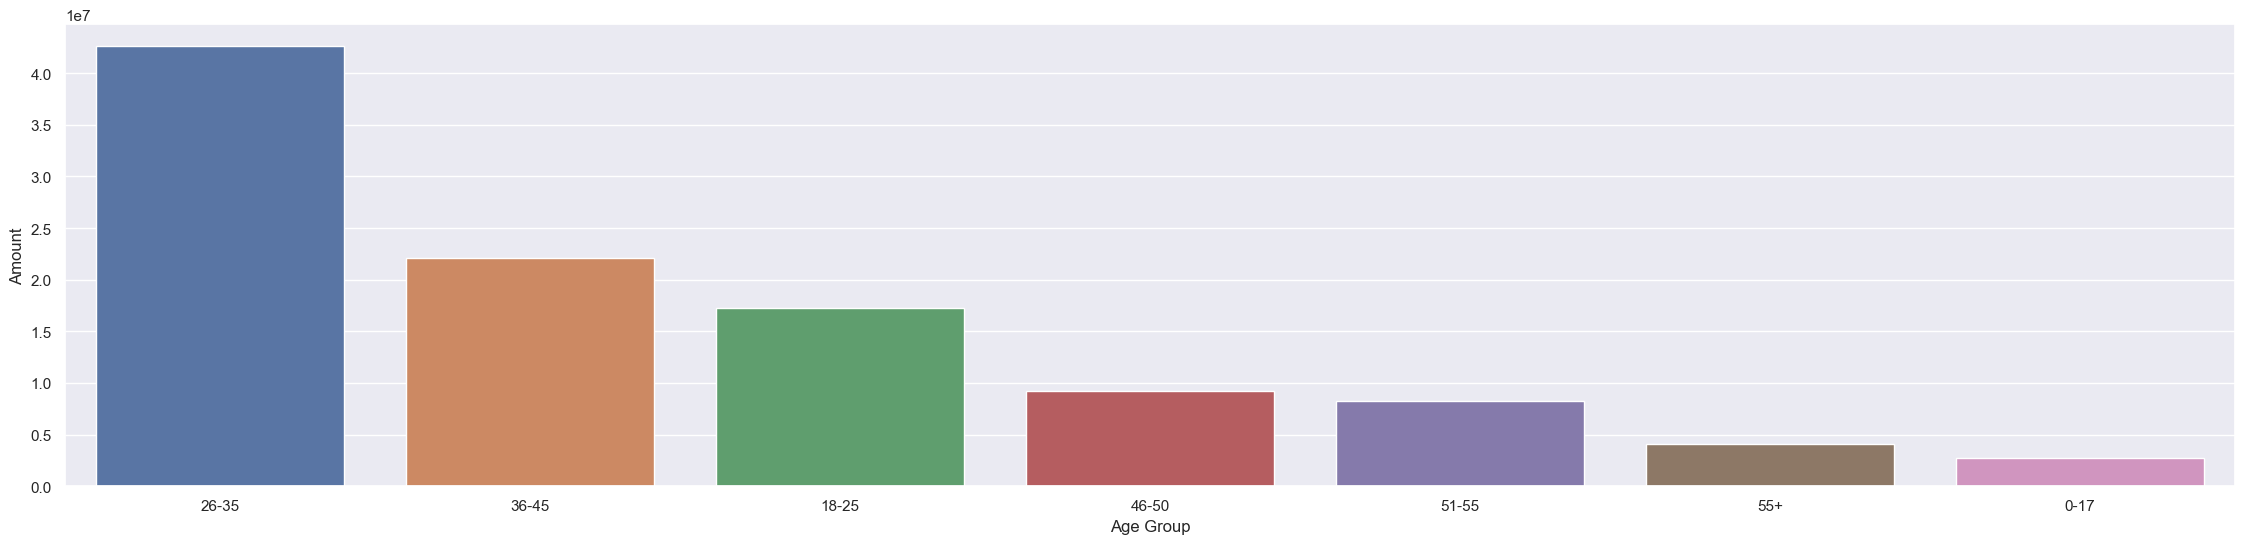

In [17]:
sns.barplot(x='Age Group' , y='Amount' ,data = age_wise_sale ,hue='Age Group')
sns.set (rc = {'figure.figsize':(28,6)})

**The data indicates that most female buyers are between 26 and 35 years old.**

# ---------------------------------------------------------

**State Wise**

In [18]:
dw.columns 

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
state_wise_sale = dw.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)
state_wise_sale

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


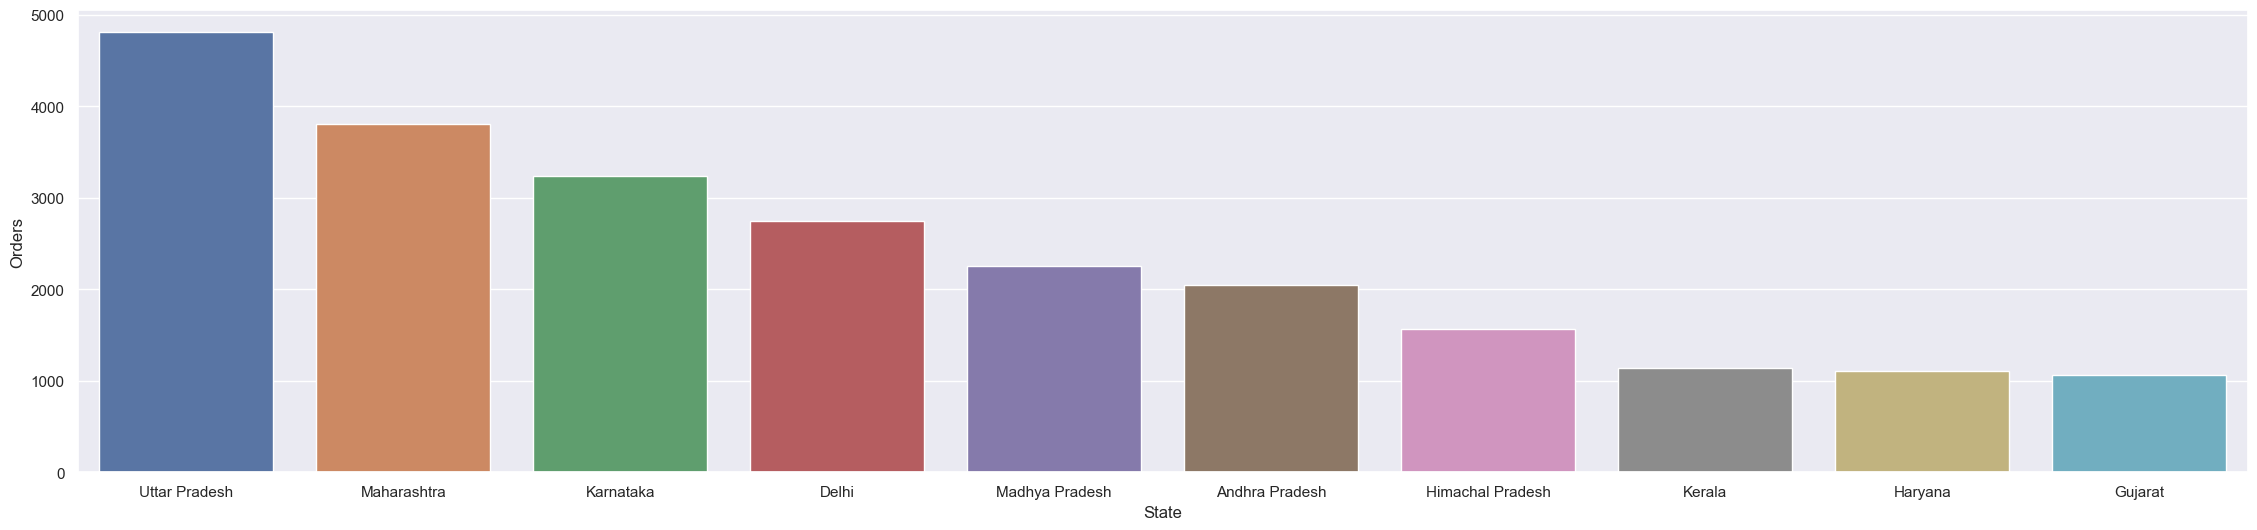

In [20]:
sns.barplot(x= 'State' , y = 'Orders' ,  data = state_wise_sale , hue = 'State' )

sns.set (rc = {'figure.figsize':(28,6)})

In [21]:
amt_wise_sale = dw.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
amt_wise_sale

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


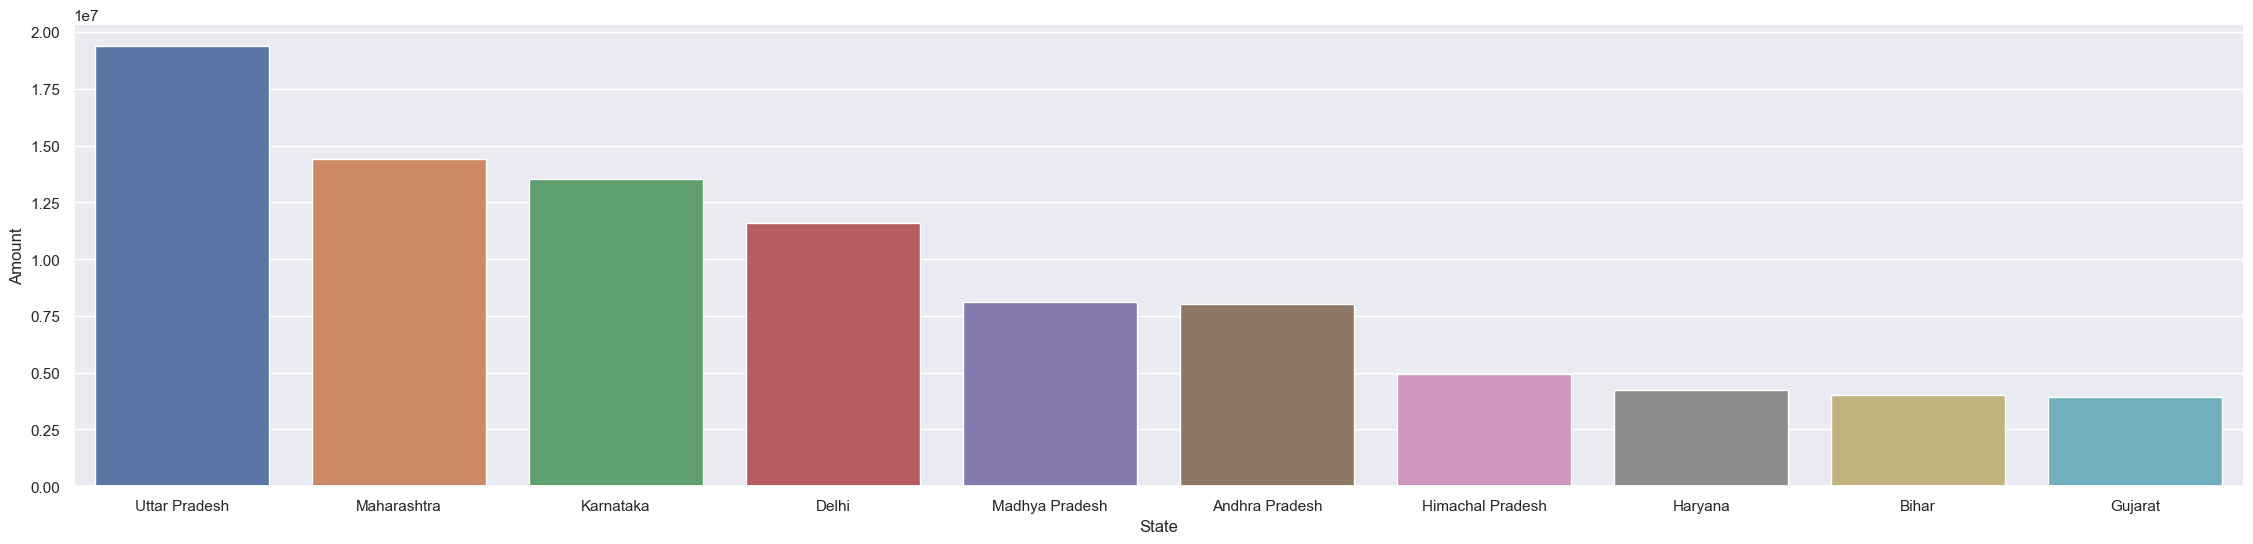

In [22]:
sns.barplot(x='State' , y = 'Amount' , data = amt_wise_sale , hue = 'State')
sns.set (rc = {'figure.figsize':(22,8)})

**Uttar Pradesh, Maharashtra, and Karnataka emerge as the top states in terms of both order volume and total sales.**

# ---------------------------------------------------------

**Marital Status**   
0 = Married  
1 = Non - Married  

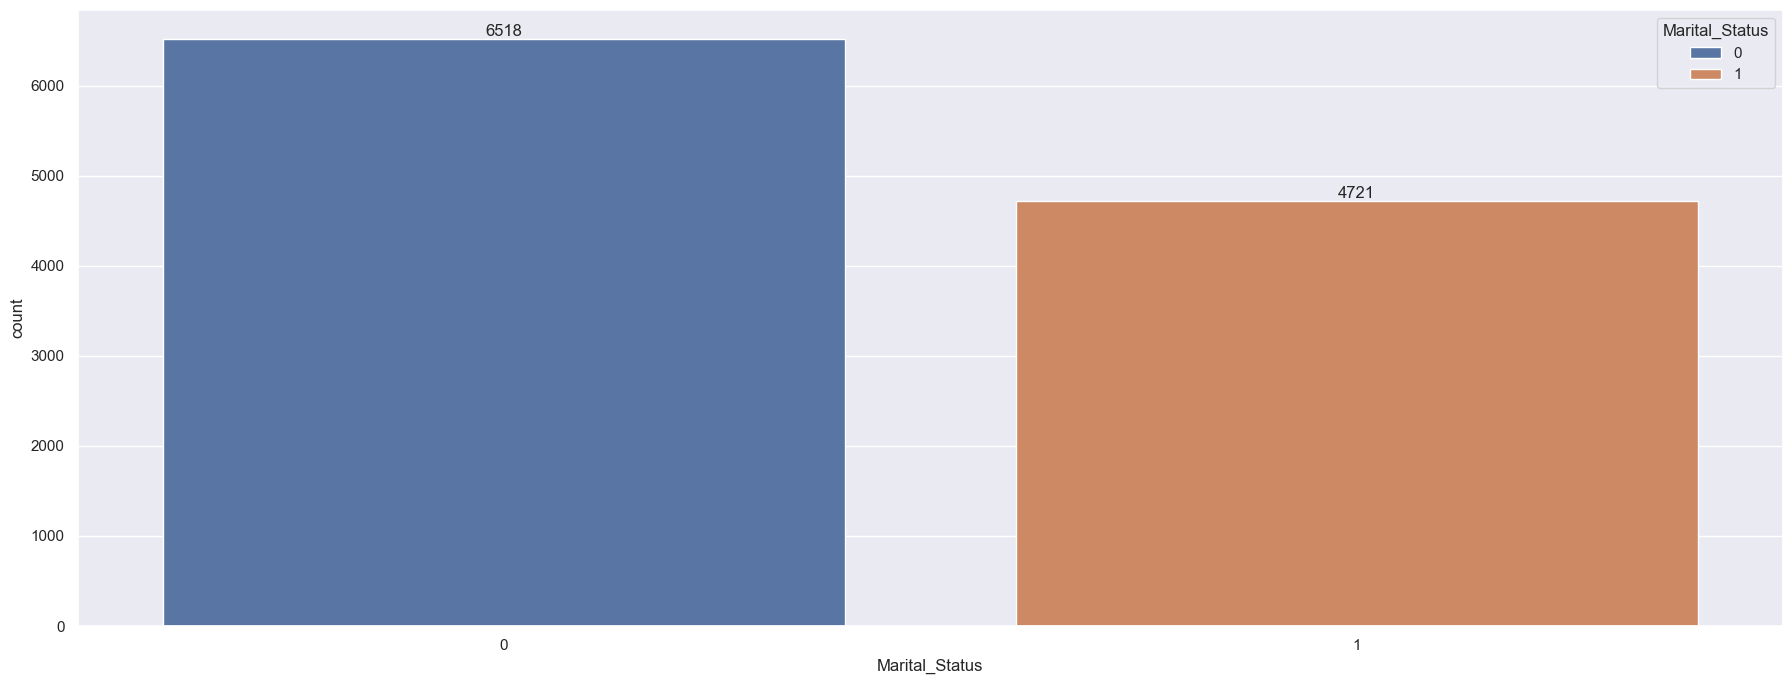

In [23]:
ax = sns.countplot(data = dw , x = 'Marital_Status' , hue = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc = {'figure.figsize':(10,8)})

In [24]:
ms_wise_sale = dw.groupby(['Marital_Status' , 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
ms_wise_sale

# 0 = Married
# 1 = Non - Married

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


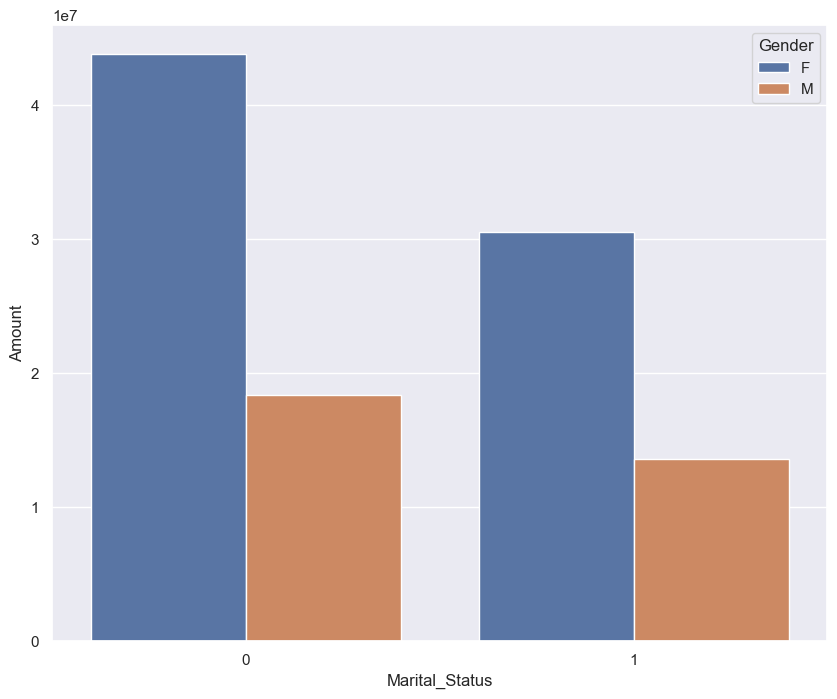

In [25]:
sns.barplot(x = 'Marital_Status' , y = 'Amount' , data = ms_wise_sale , hue = 'Gender')
sns.set(rc = {'figure.figsize':(5,5)})

**Married women dominate the market, both in terms of buyer numbers and spending ability.**

# ---------------------------------------------------------

**Occupation**

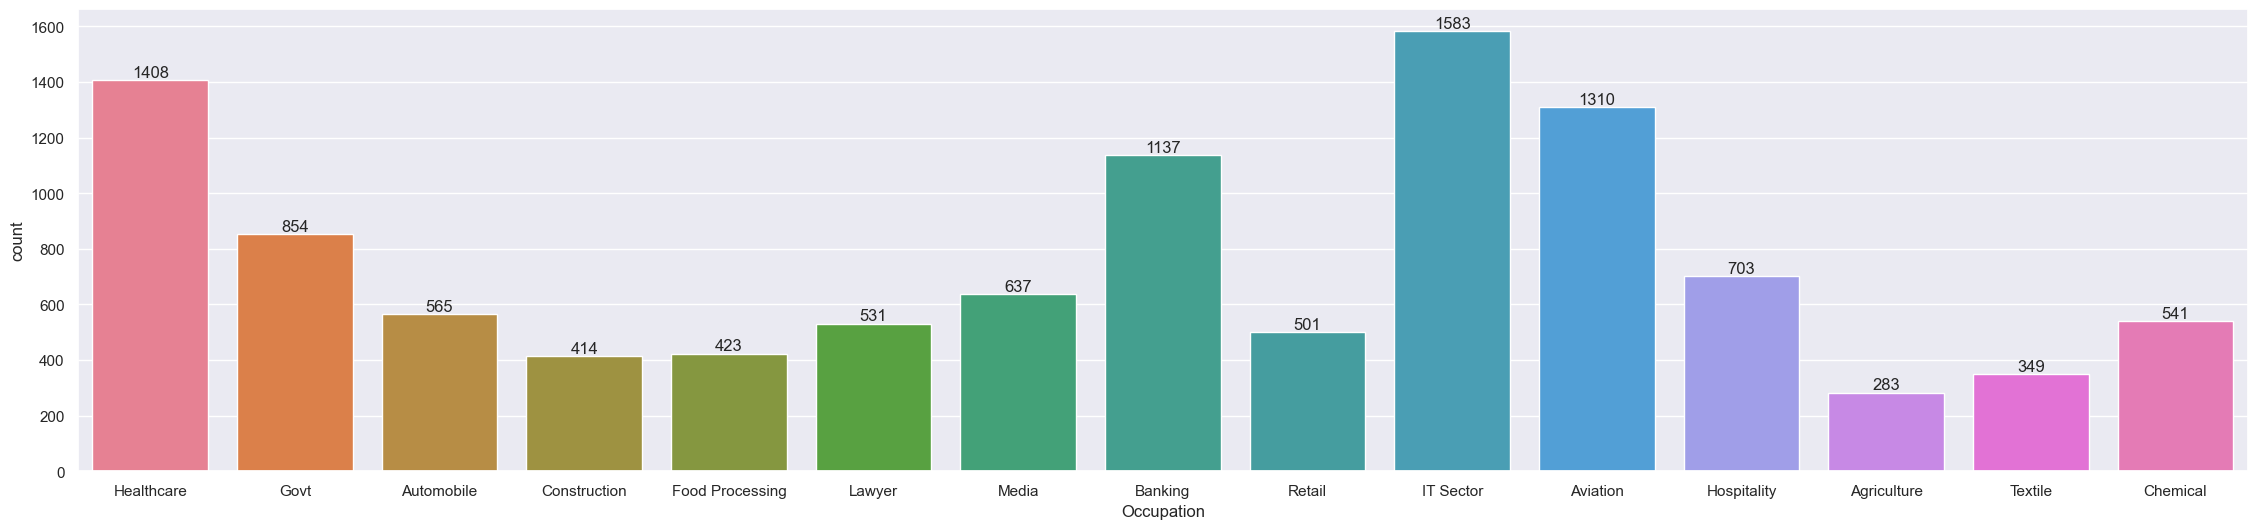

In [34]:
ax = sns.countplot(x = 'Occupation' , data = dw , hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc = {'figure.figsize':(28,6)})

In [27]:
occ_wise_sale = dw.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
occ_wise_sale

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


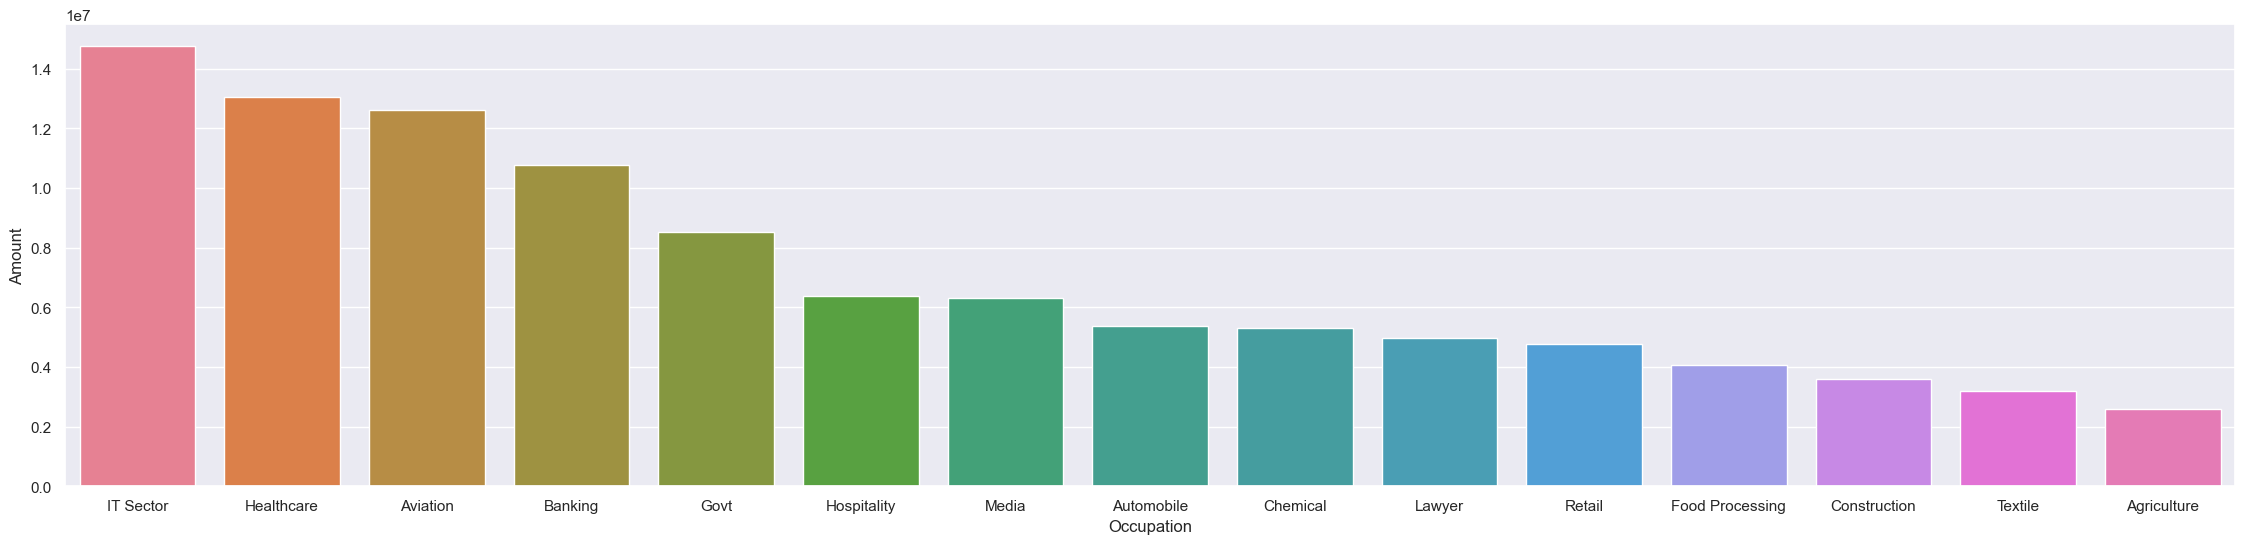

In [28]:
sns.barplot(x = 'Occupation' , y = 'Amount' , data = occ_wise_sale , hue = 'Occupation')
sns.set (rc = {'figure.figsize':(28,6)})

**The data indicates that individuals working in IT, healthcare, and aviation are the most frequent buyers.**

# ---------------------------------------------------------

**Product Category**

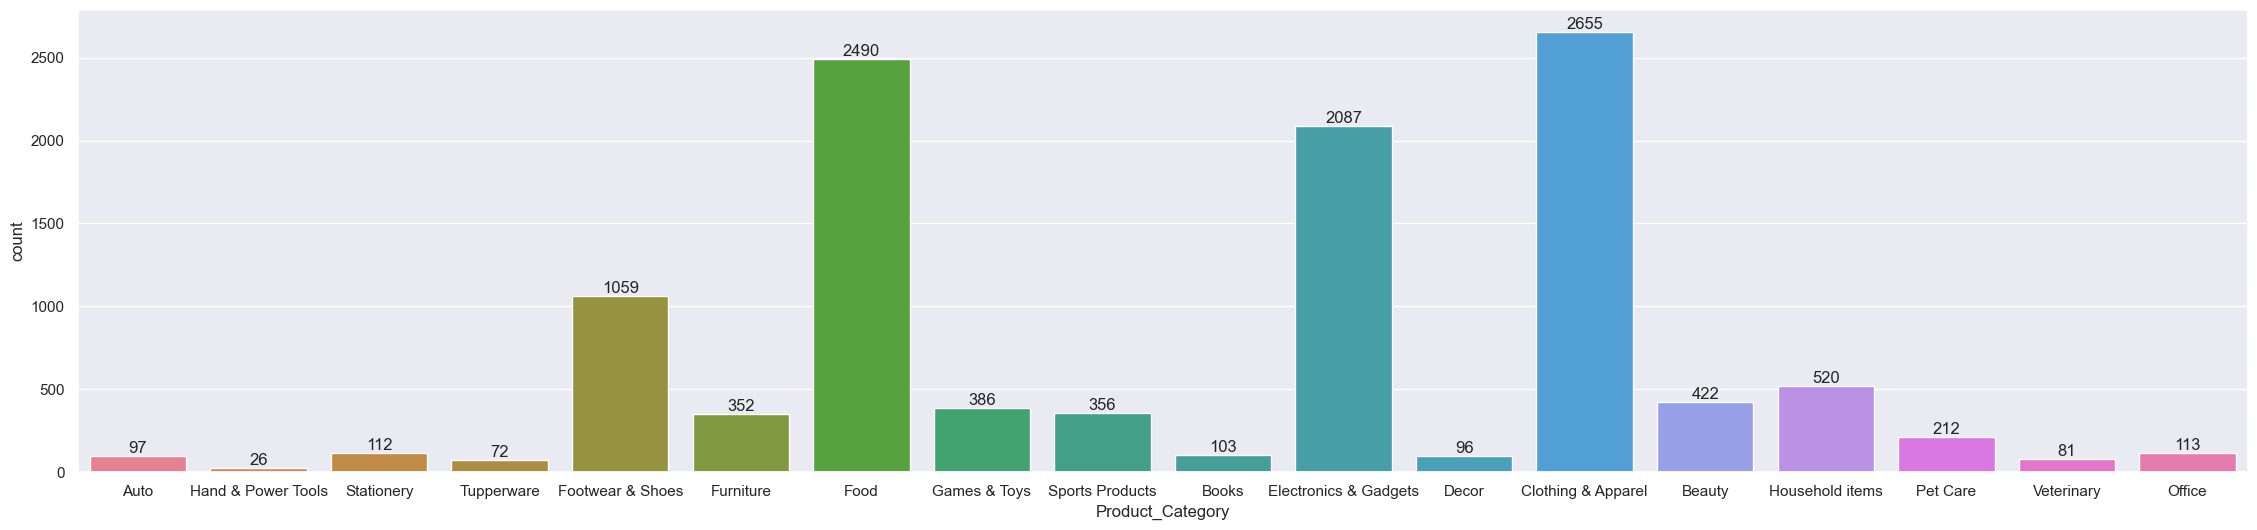

In [29]:
ax = sns.countplot(x = 'Product_Category' , data = dw , hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc = {'figure.figsize':(28,6)})

In [30]:
prod_wise_sale = dw.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
prod_wise_sale

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


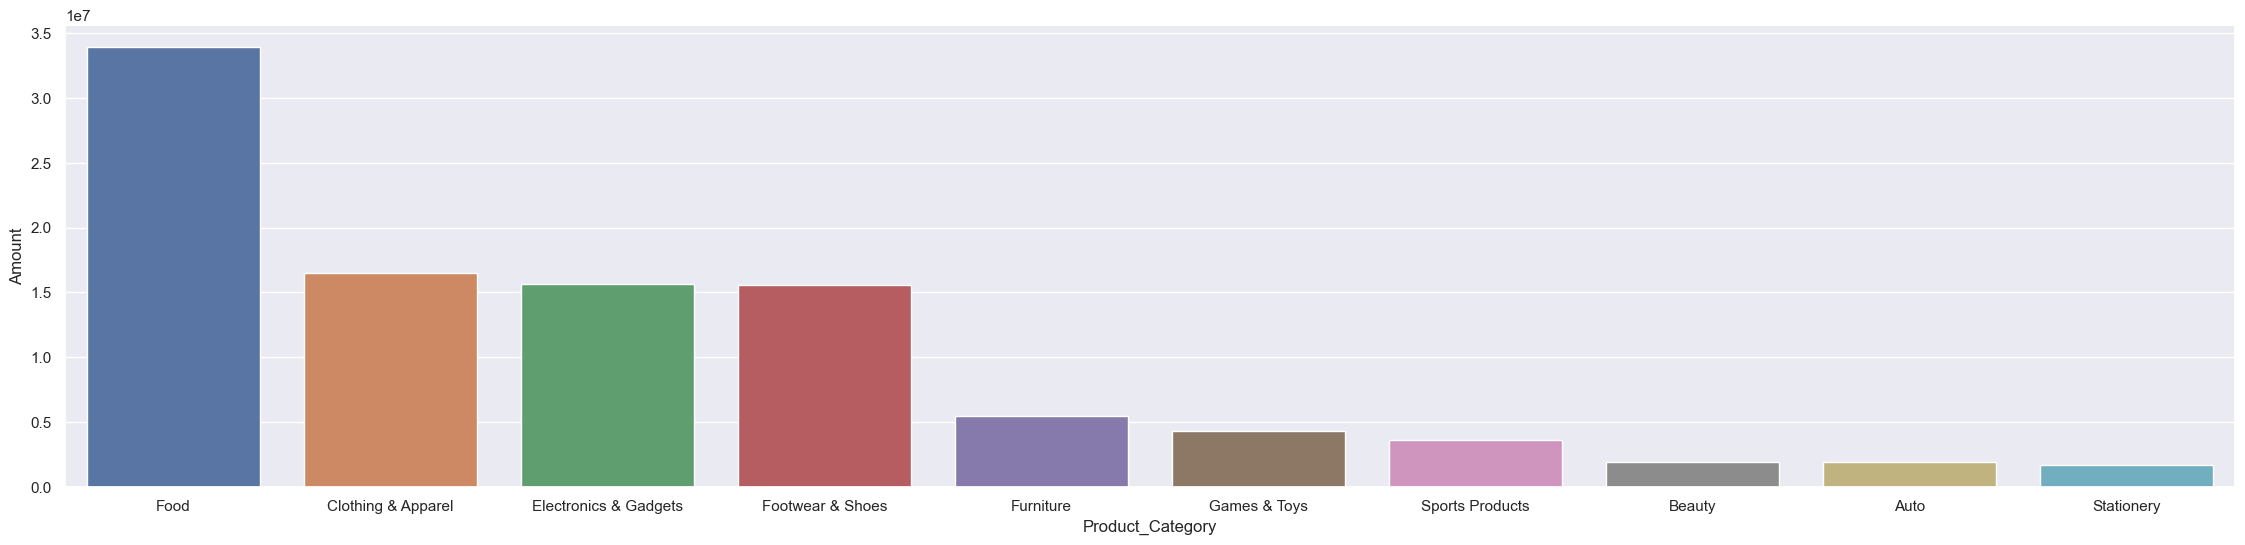

In [31]:
sns.barplot(x = 'Product_Category' , y = 'Amount' , data = prod_wise_sale , hue = 'Product_Category')
sns.set (rc = {'figure.figsize':(28,6)})

**These three categories - food, clothing, and electronics - account for the majority of sales.**

# ---------------------------------------------------------

**Product_ID**

In [32]:
prod_id_wise_sale = dw.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
prod_id_wise_sale

,Product_ID,Amount
1679,P00265242,540136.0
644,P00110942,424833.0
1146,P00184942,401816.0
654,P00112142,341020.0
396,P00059442,338571.0
1504,P00237542,322363.0
388,P00058042,307040.0
642,P00110742,294548.0
643,P00110842,290661.0
492,P00080342,283309.0


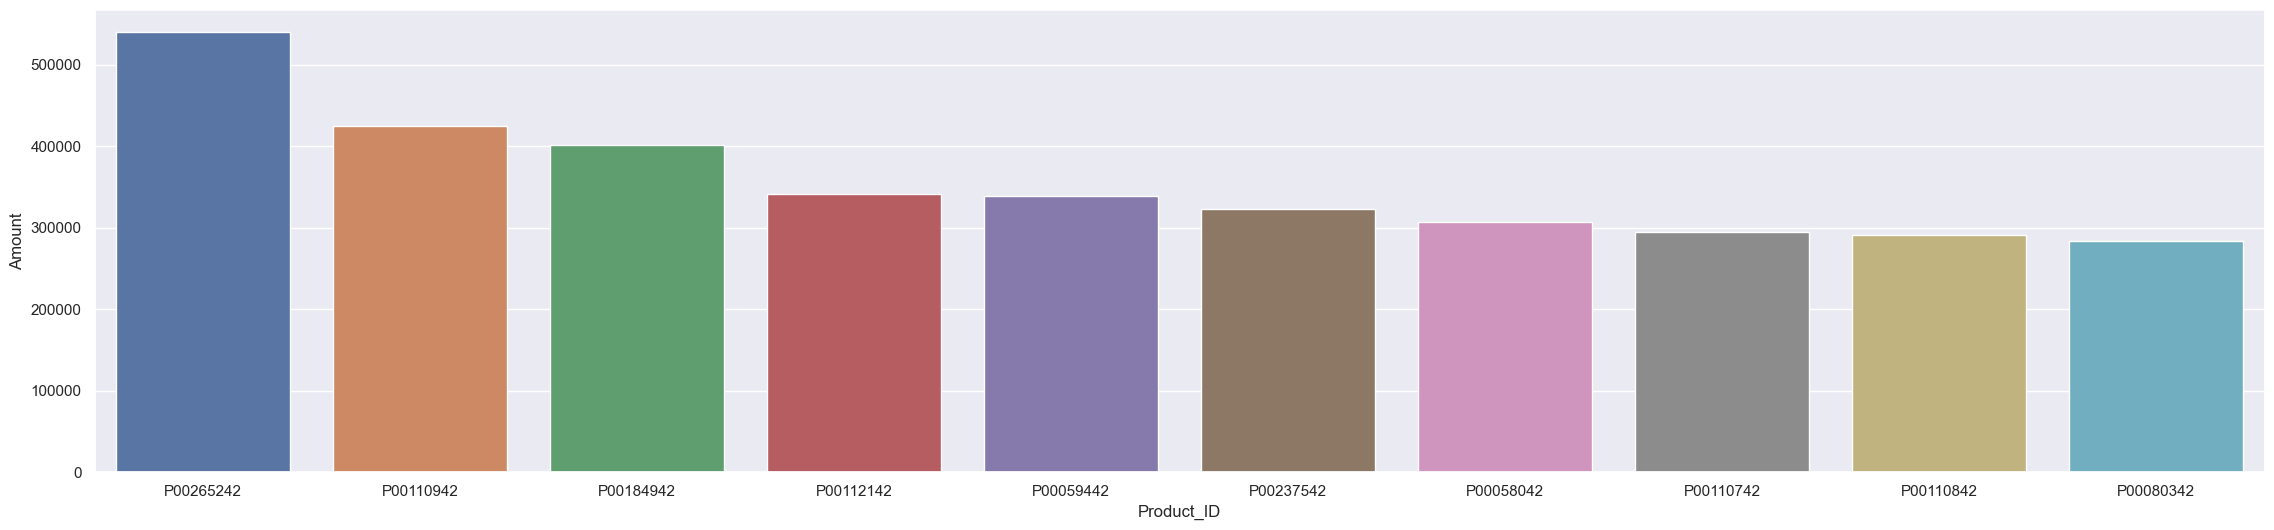

In [33]:
sns.barplot(x = 'Product_ID' , y = 'Amount' , data = prod_id_wise_sale , hue = 'Product_ID')
sns.set (rc = {'figure.figsize':(28,6)})

#  ***Thank You - Yash Shukla***